Your task is to:
(1)
Choose any three of the “wide” datasets identified in the Week 5
 Discussion items.  (You may use your own dataset; please don’t use my Sample Post dataset, since that was used in your Project 1 assignment!)  
For each of the three chosen datasets:
• Create a .CSV file (or optionally, a MySQL database!) that includes all of the information included in the dataset
.  You’re encouraged to use a “wide” structure similar to how the information appears in the discussion item, so that you can practice tidying and 
transformations as described below.
• Read the information from your .CSV file into Python,  and use pandas as needed to tidy and transform your data.  [Most of your grade will be based on this step!]
• Perform the analysis requested in the discussion item
. 
• Your code should be in an Jupyter Notebook, posted to your GitHub repository, and should include narrative descriptions of your data cleanup work, analysis, and conclusions.
(2)
Please include the URL for the Jupyter Notebook in your homework submission, for each of the three chosen datasets
. You may create a single Jupyter Notebook,  or three separate notebooks.

# Social Indicators NYC Open Data

### Imports and set notebook options

In [27]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 1000)

### Imports dataset and replaces all values of * which indicate null in dataset to nan with numpy

In [28]:
URL = "/Data.csv"
data = pd.read_csv(URL) #reads csv of full data set which is previously summarized other sources.
data.replace('*', np.nan).head() #replaces all null columns that were denoted * with NaN

,Domain,Indicator,Dimension Category,Dimension,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Defintion,Source,Notes
0,Education,Enrolled Full Day Pre-K Students,Citywide,Citywide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"19,287","52,741","68,647","69,510",Number of four-year-olds enrolled in full day ...,NYC Department of Education,NaN
1,Education,Enrolled Full Day Pre-K Students,Borough,Bronx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0%,22.7%,21.3%,20.5%,The percentage of students enrolled in Pre-K b...,NYC Department of Education,NaN
2,Education,Enrolled Full Day Pre-K Students,Borough,Brooklyn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.7%,32.2%,31.7%,32.3%,The percentage of students enrolled in Pre-K b...,NYC Department of Education,NaN
3,Education,Enrolled Full Day Pre-K Students,Borough,Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.3%,13.8%,12.2%,11.8%,The percentage of students enrolled in Pre-K b...,NYC Department of Education,NaN
4,Education,Enrolled Full Day Pre-K Students,Borough,Queens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.9%,25.6%,29.0%,29.6%,The percentage of students enrolled in Pre-K b...,NYC Department of Education,NaN


In [29]:
data.shape #To confirm that all coluns and rows were read into pandas.

(1592, 25)

### Data needs to be tidy so an array is created first from the domain column to analyze possible useful data

In [30]:
data_source_domain = data.Domain.unique()
data_source_domain

array(['Education', 'Health & Wellbeing', 'Housing', nan,
       'Personal & Community Safety', 'Economic Security and Mobility',
       'Empowered Residents & Neighborhoods',
       'Core Infrastructure & the Environment',
       'Diverse and Inclusive Government'], dtype=object)

In [31]:
print('The total number or sources for data is ' + str(len(data_source_domain))) # see output for number of sources

The total number or sources for data is 9


### The Domain column is where I will start to tidy data and pull what is useful. Housing Data will be the subject of further data analysis. 

In [32]:
housing = data[data['Domain'] == 'Housing'] # creates a variable for all data for "Housing" in the "Domain" column

In [33]:
df1 = housing.drop(housing.columns[4:21], axis=1) # drops irrelevant columns
df1 = df1.drop(df1.columns[7:], axis=1) # drops further irrelevant columns



In [34]:
df1.head() # displays first 5 columns to verify tidying of data

,Domain,Indicator,Dimension Category,Dimension,2017,Defintion,Source
134,Housing,New Admissions to NYCHA's Section 8 (count),Race/Ethnicity,Other,*,Total number of families admitted to NYCHA Sec...,NYCHA's Siebel Data
159,Housing,New Admissions to NYCHA's Section 8 (count),Gender of Head of Household,Male,*,Total number of families admitted to NYCHA Sec...,NYCHA's Siebel Data
192,Housing,New Admissions to NYCHA's Section 8 (count),Gender of Head of Household,Female,*,Total number of families admitted to NYCHA Sec...,NYCHA's Siebel Data
214,Housing,New Admissions to NYCHA's Section 8 (count),Gender of Head of Household,Data Not Available,*,Total number of families admitted to NYCHA Sec...,NYCHA's Siebel Data
268,Housing,"Notices of Foreclosure Rate per 1,000 (1-4 fam...",Community District,BX 03 - Morrisania/Crotona,24.7,This indicator measures the total number of re...,NYU Furman Center Core Data http://coredata.nyc/


### Further tidying of data will be done to the "Indicator" column to ultimately analyze vacancy rates.

In [35]:
df1.Indicator.unique() # Creates array to find unique Indicators

array(["New Admissions to NYCHA's Section 8 (count)",
       'Notices of Foreclosure Rate per 1,000 (1-4 family & condo properties)',
       'NYCHA New Admissions (count)', 'NYCHA New Admissions (percent)',
       "New Admissions to NYCHA's Section 8 (percent)",
       'Total Number of Families on Public Housing Wait List (count)',
       'Total Number of Families on Public Housing Wait List (percent)',
       'Total Number of Families on Public Housing Wait List',
       'Total Number of Families on Section 8 Wait List (count)',
       'Total Number of Families on Section 8 Wait List (percent)',
       'Total Number of Families on Section 8 Wait List',
       'Rental Housing Vacancy Rate', 'Homeless: Average Daily Census',
       'Homeless: Average System Length of Stay',
       'Severely Rent-Burdened Households',
       'Serious Housing Code Violations (per 1,000 privately owned rental units)'],
      dtype=object)

In [36]:
vacancy_rate = df1[df1['Indicator'] == 'Rental Housing Vacancy Rate']
vacancy_rate.shape # Examines new variable for dataset to determine  its usability for visual anlaysis.

(14, 7)

In [37]:
vacancy_rate = vacancy_rate.copy() # creates copy due to copy message 
vacancy_rate['2017'] = vacancy_rate['2017'].str.rstrip('%').astype('float') / 100.0


In [38]:
vacancy_rate.dtypes # shows that column or the year 2017 has been changed from an object to a float

Domain                 object
Indicator              object
Dimension Category     object
Dimension              object
2017                  float64
Defintion              object
Source                 object
dtype: object

Text(0,0.5,'%age Vacancy')

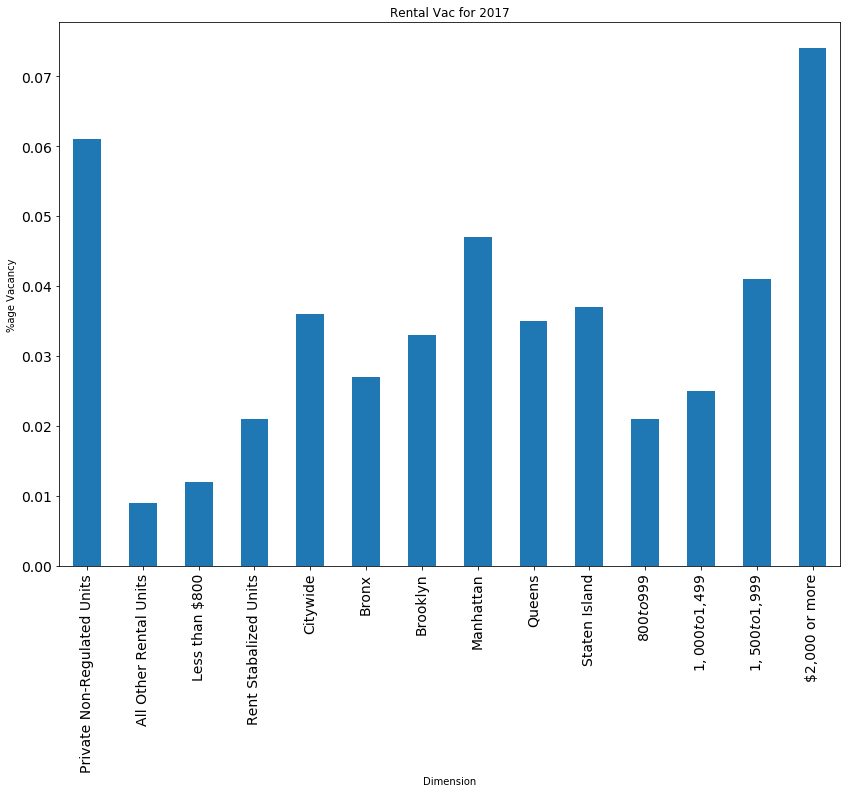

In [39]:
ax = vacancy_rate.plot.bar(x='Dimension', figsize=(14,10), fontsize=14, title="Rental Vac for 2017", legend=False)
ax.set_ylabel("%age Vacancy")

## Conclusion
**The data set is now tidy and as a result a visualization, along with several dataframes for analysis, have been created. For the data shown in the above bar chart it is understood that from the price point date, vacancy rates are highest at the highest price point category:** **$2,000 or more.** **From the location categories, Manhattan has the highest vacancy rates.**